In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

import sys
sys.path.append("..")
from util import print_answer

%matplotlib inline

## 1. Загрузите данные из файла abalone.csv.

Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [2]:
df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 2. Преобразуйте признак Sex в числовой.

Значение F должно перейти в -1, I — в 0, M — в 1.

In [3]:
df["Sex"].replace({"F": -1, "I": 0, "M": 1}, inplace=True)

## 3. Разделите содержимое файлов на признаки и целевую переменную.

В последнем столбце записана целевая переменная, в остальных — признаки.

In [4]:
X = df.loc[:, "Sex":"ShellWeight"]
y = df["Rings"]

## 4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) 

с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [5]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []
for n in range(1, 51):
    model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    score = cross_val_score(model, X, y, cv=cv, scoring="r2").mean()
    scores.append(score)

## 5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52.

Это количество и будет ответом на задание.

In [6]:
for n, score in enumerate(scores):
    if score > 0.52:
        print_answer(1, str(n + 1))
        break

22


## 6. Обратите внимание на изменение качества по мере роста числа деревьев. 

Ухудшается ли оно?

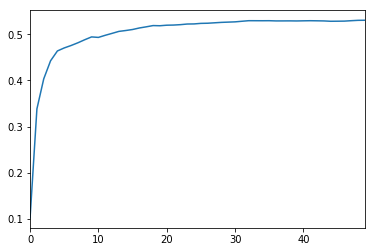

In [7]:
pd.Series(scores).plot()